In [135]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from nltk import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ddayv\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [136]:
df = pd.read_excel('./rotulação/TweetsPolitical01 OK OK.xlsx')
df2 = pd.read_excel('./rotulação/TweetsPolitical02 OK OK.xlsx')
df3 = pd.read_excel('./rotulação/TweetsPolitical03 OK OK.xlsx')
df4 = pd.read_excel('./rotulação/TweetsPolitical04 OK OK.xlsx')
df5 = pd.read_excel('./rotulação/TweetsPolitical05 OK OK.xlsx')
df6 = pd.read_excel('./rotulação/TweetsPolitical06 OK OK.xlsx')
df7 = pd.read_excel('./rotulação/TweetsPolitical07 OK OK.xlsx')
df8 = pd.read_excel('./rotulação/TweetsPolitical08 OK OK.xlsx')
df9 = pd.read_excel('./rotulação/TweetsPolitical09 OK OK.xlsx')
df10 = pd.read_excel('./rotulação/TweetsPolitical10 OK OK.xlsx')
df11 = pd.read_excel('./rotulação/TweetsPolitical11 OK OK.xlsx')
df12 = pd.read_excel('./rotulação/TweetsPolitical12 OK OK.xlsx')
df13 = pd.read_excel('./rotulação/TweetsPolitical13 OK OK.xlsx')
df14 = pd.read_excel('./rotulação/TweetsPolitical14 OK OK.xlsx')
df15 = pd.read_excel('./rotulação/TweetsPolitical15 OK OK.xlsx')

lista = [df,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15]

df_all = pd.concat(lista)
df_all.shape

(12670, 2)

In [137]:
df_all[df_all['Polaridade'] == -2]['Tweet'][488]
#df_all[df_all['Polaridade']
# df_remove = df_all[df_all['Polaridade'] == -2]
# ultimo_df = df_all.drop(df_remove.index)
# df_remove = df_all[df_all['Polaridade'] == 11]
# ultimo_df = df_all.drop(df_remove.index)

'Governo do #PSDB golpista &gt; Falta merenda - surrupiada - sobra polícia armada pra oprimir adolescentes que lutam por suas escolas públicas.\n'

<AxesSubplot:xlabel='Polaridade', ylabel='count'>

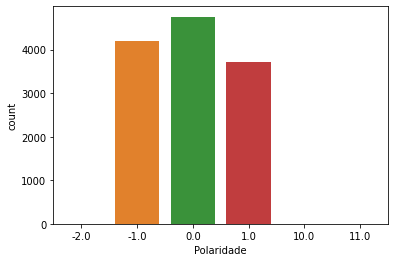

In [138]:
df_all.isnull().sum()
df_all = df_all.dropna()
df_all.isnull().sum()

sns.countplot(data=df_all, x='Polaridade')

In [139]:
df_all = df_all.reset_index()
df_all

,index,Tweet,Polaridade
0,0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0
...,...,...,...
12663,78,Bom diaa #SD Moisés Sou Boina Preta e Não Tem...,1.0
12664,79,"Sei que leve por divisa esse ""V"" que simboliza...",1.0
12665,80,L'ambiance d'hier au stade c'est grace ao Maca...,1.0
12666,81,Mais tarde tem mais SD no Chopp E Cia...hoje é...,1.0


In [140]:
#df_all = df_all.drop(df_all[df_all['Polaridade'] == 0.0].index).reset_index()
df_all = df_all.drop(columns=['index'])
df_all.drop(df_all[df_all['Polaridade'] == 11].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == -2].index, inplace=True)
df_all.drop(df_all[df_all['Polaridade'] == 10].index, inplace=True)

df_all

,Tweet,Polaridade
0,- #CaoNossoDeCadaDia #Novo - Vanessa Mandotti ...,0.0
1,"- Bola pra frente que amanhã é outro dia, outr...",1.0
2,- Cara de mal? Acho que não... Apenas um corte...,1.0
3,""" #PCdoB O PARTIDO QUE FAZ A DIFERENÇA: LEAL E...",1.0
4,"""@camaradamae: #PCdoB o Partido da coragem ! ...",1.0
...,...,...
12663,Bom diaa #SD Moisés Sou Boina Preta e Não Tem...,1.0
12664,"Sei que leve por divisa esse ""V"" que simboliza...",1.0
12665,L'ambiance d'hier au stade c'est grace ao Maca...,1.0
12666,Mais tarde tem mais SD no Chopp E Cia...hoje é...,1.0


In [141]:
Tweet = df_all['Tweet']
polarity = np.asarray(df_all['Polaridade'])

polarity

array([0., 1., 1., ..., 1., 1., 1.])

In [142]:
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF
X_train_transform.shape

(12665, 24464)

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

clf = MultinomialNB().fit(X_train, Y_train) # Aplicando naive bayes
predicted = clf.predict(X_test)

print(metrics.classification_report(Y_test, predicted))

              precision    recall  f1-score   support

        -1.0       0.53      0.86      0.66      1217
         0.0       0.70      0.64      0.67      1434
         1.0       0.67      0.29      0.41      1149

    accuracy                           0.61      3800
   macro avg       0.63      0.60      0.58      3800
weighted avg       0.64      0.61      0.59      3800



In [144]:
def pre_X(frases):
    lista = []
    
    for frase in frases:
        lista.append(frase)
        
    return lista

def pre_Y(number):
    lista = []
    
    for numb in number:
        lista.append(numb)
    
    return lista


In [145]:
def set_array(frases):
    
    vocab = []
    
    for frase in frases:
        
        text_array = Tokenize(frase)
        vocab.extend(text_array)
    
    return vocab

def Tokenize(f):     ## Pre-processando a frase
    
    ## Colocando em minusculo
    ## Retirando a pontuaçao
    ## Retirando as StopWords
    
    f = f.lower().replace('\n', '').replace('-','').replace('#','').replace('.','').replace(',','').replace('!','').replace('r\n','').replace('  ','')
    token = RegexpTokenizer(r"\w+")
    f = token.tokenize(f)
    
    stop_words = set(stopwords.words('portuguese'))
    
    new_word = [word for word in f if not word in stop_words]
    
    return ' '.join(new_word)

def remove_user(frase):

    frase = frase.split(' ')

    for palavra in frase:
        if '@' in palavra:
            frase = ' '.join(frase).replace(palavra, '').split(' ')
    return ' '.join(frase)

In [180]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3 , activation='softmax')
])

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [181]:
Tweet = Tweet.apply(remove_user)
Tweet_preprocessed = Tweet.apply(Tokenize)

count_vect = CountVectorizer()
X_train = count_vect.fit_transform(Tweet_preprocessed)

tfidf_transformer = TfidfTransformer()
X_train_transform = tfidf_transformer.fit_transform(X_train) # Aplicando o TF-IDF


X_train, X_test, Y_train, Y_test = train_test_split(X_train_transform, polarity, test_size=0.3)

X_train_

<8865x26007 sparse matrix of type '<class 'numpy.float64'>'
	with 78050 stored elements in Compressed Sparse Row format>

In [182]:
X_test_

<3800x26007 sparse matrix of type '<class 'numpy.float64'>'
	with 33573 stored elements in Compressed Sparse Row format>

In [183]:
one = OneHotEncoder(sparse=False)

y_one = one.fit_transform(Y_train.reshape(-1,1))

In [184]:
fit = model.fit(X_train.todense(), y_one, epochs=5, validation_data=(X_test.todense(), one.transform(Y_test.reshape(-1,1))))

Epoch 1/5
278/278 [==============================] - 8s 28ms/step - loss: 1.0016 - accuracy: 0.5032 - val_loss: 0.8807 - val_accuracy: 0.5979
Epoch 2/5
278/278 [==============================] - 7s 26ms/step - loss: 0.6254 - accuracy: 0.7618 - val_loss: 0.8562 - val_accuracy: 0.6287
Epoch 3/5
278/278 [==============================] - 7s 26ms/step - loss: 0.2888 - accuracy: 0.9050 - val_loss: 1.0230 - val_accuracy: 0.6189
Epoch 4/5
278/278 [==============================] - 7s 26ms/step - loss: 0.1388 - accuracy: 0.9584 - val_loss: 1.2002 - val_accuracy: 0.6050
Epoch 5/5
278/278 [==============================] - 7s 26ms/step - loss: 0.0867 - accuracy: 0.9769 - val_loss: 1.3240 - val_accuracy: 0.6042


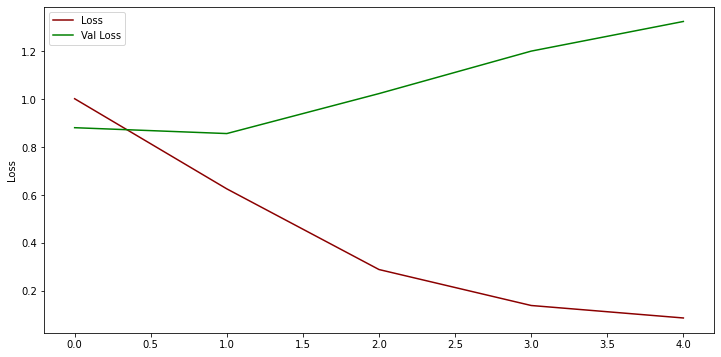

In [185]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.ylabel('Loss')
plt.show()

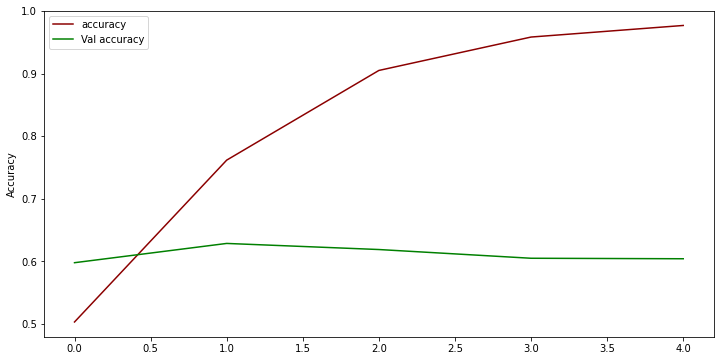

In [186]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

In [187]:
acc = model.evaluate(X_test.todense(), one.transform(Y_test.reshape(-1,1)))

119/119 [==============================] - 1s 12ms/step - loss: 1.3240 - accuracy: 0.6042


In [188]:
vectorize_layer = TextVectorization(
 max_tokens=10000,
 output_mode='int',
 output_sequence_length=len(max(df_all['Tweet'])))

vocab = set_array(df_all['Tweet'])
vectorize_layer.adapt(np.unique(vocab))
len(vectorize_layer.get_vocabulary())

134

In [189]:
model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(
        input_dim=len(vectorize_layer.get_vocabulary()),
        output_dim=128,mask_zero=True),
    
    tf.keras.layers.LSTM(150, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(50, activation='relu' ,return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.LSTM(50 , activation='relu'),
    tf.keras.layers.Dropout(0.3),
    
    tf.keras.layers.Dense(3, activation='softmax')
])


model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy']
)

In [190]:
X_train, X_test, Y_train, Y_test = train_test_split(Tweet_preprocessed, polarity, test_size=0.3)
X_train.shape

(8865,)

In [192]:
fit = model.fit(np.asarray(pre_X(X_train)), y_one, epochs=10, batch_size=512 ,validation_data=(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1))))

Epoch 1/10
18/18 [==============================] - 60s 3s/step - loss: 1.0957 - accuracy: 0.3760 - val_loss: 1.0986 - val_accuracy: 0.3779
Epoch 2/10
18/18 [==============================] - 62s 3s/step - loss: 1.0933 - accuracy: 0.3808 - val_loss: 1.0960 - val_accuracy: 0.3779
Epoch 3/10
18/18 [==============================] - 65s 4s/step - loss: 1.0933 - accuracy: 0.3809 - val_loss: 1.0962 - val_accuracy: 0.3779
Epoch 4/10
18/18 [==============================] - 62s 3s/step - loss: 1.0930 - accuracy: 0.3809 - val_loss: 1.0961 - val_accuracy: 0.3779
Epoch 5/10
18/18 [==============================] - 65s 4s/step - loss: 1.0932 - accuracy: 0.3809 - val_loss: 1.0954 - val_accuracy: 0.3779
Epoch 6/10
18/18 [==============================] - 62s 3s/step - loss: 1.0928 - accuracy: 0.3809 - val_loss: 1.0954 - val_accuracy: 0.3779
Epoch 7/10
18/18 [==============================] - 65s 4s/step - loss: 1.0928 - accuracy: 0.3809 - val_loss: 1.0958 - val_accuracy: 0.3779
Epoch 8/10
18/18 [==

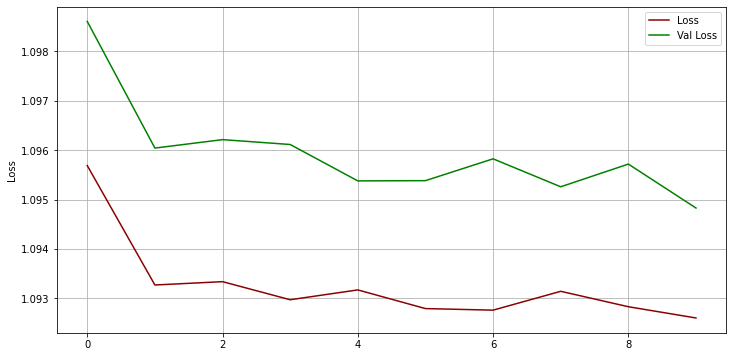

In [193]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['loss'], label='Loss', color='darkred')
plt.plot(fit.history['val_loss'], label='Val Loss', color='green')
plt.legend()
plt.grid()
plt.ylabel('Loss')
plt.show()

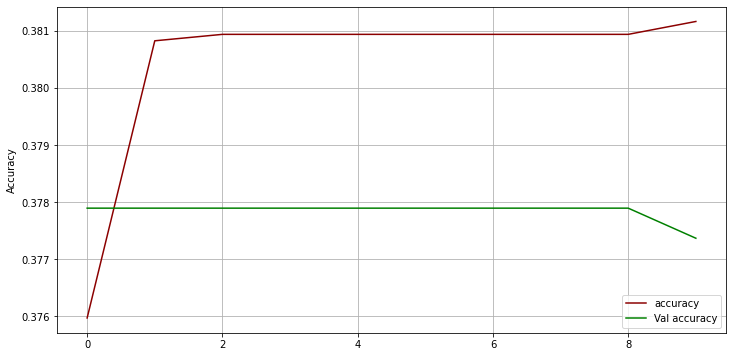

In [194]:
plt.figure(figsize=(12,6))
plt.plot(fit.history['accuracy'], label='accuracy', color='darkred')
plt.plot(fit.history['val_accuracy'], label='Val accuracy', color='green')
plt.legend()
plt.grid()
plt.ylabel('Accuracy')
plt.show()

In [195]:
acc = model.evaluate(np.asarray(pre_X(X_test)), one.transform(Y_test.reshape(-1,1)))

119/119 [==============================] - 10s 86ms/step - loss: 1.0948 - accuracy: 0.3774
